# K-Nearest Neighbors Classification

In [82]:
import numpy as np


In [84]:
def euclidian_distance(a, b):
    return np.sqrt(np.sum((a-b)**2, axis=1))

# res = 0
# for j in range(D):
#     res += (a[j] - b[j])**2
# sqrt(res)

In [85]:
x = np.random.rand(1, 2)
y = np.random.rand(1, 2)
print(x)
print(y)
euclidian_distance(x, y)

[[0.58217976 0.48550056]]
[[0.52776704 0.33442457]]


array([0.16057615])

In [86]:
def score(X_test, y_test):
    y_pred = predict(X_test)
        
    return float(sum(y_pred == y_test))/ float(len(y_test))

In [188]:
class KNearestNeighbors():
    def __init__(self, X_train, y_train, n_neighbors, weights):

        self.X_train = X_train
        self.y_train = y_train

        self.n_neighbors = n_neighbors
        self.weights = weights

        self.n_classes = 6 # 3,4,5,6,7,8

    def euclidian_distance(self, a, b):
        return np.sqrt(np.sum((a - b)**2, axis=1))

    def kneighbors(self, X_test, return_distance=False):

        dist = []
        neigh_ind = []

#         print(X_test, self.X_train. X_test, self.X_train)
        point_dist = []
        for x_test in X_test:
            point_dist += [ self.euclidian_distance(x_test, self.X_train) ]

        for row in point_dist:
            enum_neigh = enumerate(row)
            sorted_neigh = sorted(enum_neigh,
                                  key=lambda x: x[1])[:self.n_neighbors]

            ind_list = [tup[0] for tup in sorted_neigh]
            dist_list = [tup[1] for tup in sorted_neigh]

            dist.append(dist_list)
            neigh_ind.append(ind_list)

        if return_distance:
            return np.array(dist), np.array(neigh_ind)

        return np.array(neigh_ind)

    def predict(self, X_test):

        if self.weights == 'uniform':
            neighbors = self.kneighbors(X_test)
            y_pred = np.array([
                np.argmax(np.bincount(self.y_train[neighbor]))
                for neighbor in neighbors
            ])
            #print("Y_pred: ", y_pred)
            return y_pred

        if self.weights == 'distance':

            d, ide = self.kneighbors(X_test, return_distance = True)
            inv = 1 / d
            media = inv / np.sum(inv,axis = 1)[:,np.newaxis]
            prob = []
            for i, row in enumerate(media):
                pred = self.y_train[ide[i]]
                for k in range(self.n_classes):
                    ind = np.where(pred == k)
                    pind = np.sum(row[ind])
                    prob.append(np.array(pind))
            ppred = np.array(prob).reshape(X_test.shape[0],self.n_classes)
            y_pred = np.array([np.argmax(item) for item in ppred])


            return y_pred

    def score(self, X_test, y_test):
        y_pred = self.predict(X_test)
        return float(sum(y_pred == y_test)) / float(len(y_test)), y_pred, y_test


# Load dataset(Observations/Treatments)

In [226]:
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from matplotlib import pyplot as plt

#dataset = datasets.load_iris(as_frame=True)
#X = dataset.data
#y = dataset.target

X = pd.read_csv("/home/romario/Desktop/Proyecto 1 PAtrones/winequality-red.csv") #df = X
y = X['quality']
X.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [210]:
from sklearn.datasets import load_breast_cancer
from sklearn.utils import Bunch

best_f = ['mean concave points', 'texture error', 'concave points error', 'symmetry error', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concave points', 'worst fractal dimension']

breast_cancer = load_breast_cancer()
df = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)

mean = breast_cancer.feature_names[0:10]
error = breast_cancer.feature_names[10:20]
worst = breast_cancer.feature_names[20:30]

# Most important features in a cancer cell
# * concavity, area, texture, symetry, concave points
feat1 = [mean[1]]+[mean[3]]+list(mean[6:9])
feat2 = [error[1]]+[error[3]]+list(error[6:9])
feat3 = [worst[1]]+[worst[3]]+list(worst[6:9])

feat_selected = feat1+feat2+feat3
# Change feature scope to the 5 important features
#df = df[feat_selected]

# Change feature scope to the important features got with sklearn treeclassification
df = df[best_f]

data_dict = {'data': df.values, 'target': breast_cancer.target, 'feature_names': df.columns, 'target_names': breast_cancer.target_names}

breast_cancer = Bunch(**data_dict)

#X = breast_cancer.data
#y = breast_cancer.target

In [211]:
y.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

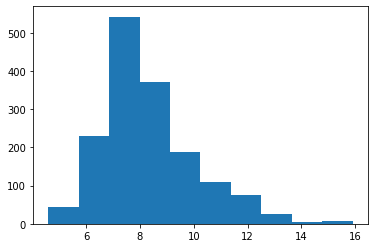

In [212]:
plt.hist(X['fixed acidity'],10)
plt.show()

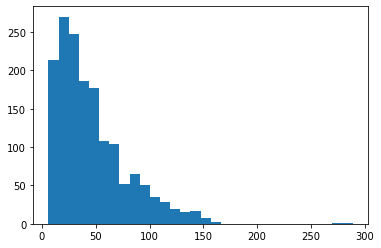

In [213]:

plt.hist(X['total sulfur dioxide'],30)
plt.show()

In [214]:
mu = np.mean(X, 0)
sigma = np.std(X, 0)
X = (X - mu ) / sigma

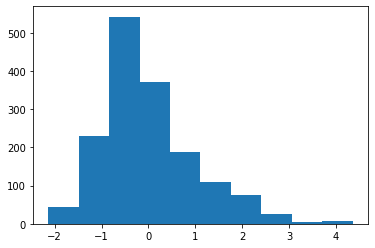

In [215]:
plt.hist(X['fixed acidity'],10)
plt.show()

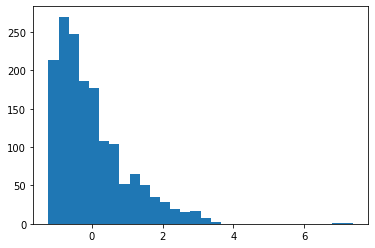

In [216]:
plt.hist(X['total sulfur dioxide'],30)
plt.show()

In [217]:
#dataset.target_names, dataset.feature_names


In [218]:
def binaryclass(data):
    new=[]
    i=0
    for x in data:
        if x==3 or x==4 or x==5:
            new.insert(i,0)
            i+=1
        else:
            new.insert(i,1)
            i+=1
    return new

def metricas(dataTest, dataPred,tipo):
    classif= binaryclass(dataPred)
    i=0
    Tp=0
    Fp=0
    Fn=0
    Tn=0
    recall=0
    precision=0

    for x in dataTest:
        if x==dataPred[i]:
            if classif[i]==1:
                Tp+=1
                i+=1
            else:
                Fp+=1
                i+=1
        else:
            if classif[i]==1:
                Fn+=1
                i+=1
            else:
                Tn+=1
                i+=1
    if tipo=='recall':
        recall=Tp/(Tp+Fn)
        return recall
    else:
        precision=Tp/(Tp+Fp)
        return precision


In [219]:
from sklearn.model_selection import GridSearchCV


if isinstance(X, pd.DataFrame):
    X = X.to_numpy()
    y = y.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(\
                X, y, test_size=0.3, random_state=45)

knn = KNeighborsClassifier()

k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', return_train_score=False)
grid.fit(X_train, y_train)
grid_mean_scores = grid.cv_results_['mean_test_score']
print(grid_mean_scores)
print(grid.best_params_)
print(grid.best_estimator_)

[0.92045964 0.87219331 0.88202274 0.87039558 0.87755045 0.86234385
 0.87040359 0.86057415 0.86949471 0.86146701 0.86323671 0.85876842
 0.85788757 0.86147502 0.85878844 0.85252643 0.84894699 0.84268498
 0.84537556 0.83732783 0.83822069 0.83374439 0.83464126 0.83015295
 0.8292721  0.83105782 0.82748639 0.83106582 0.82749439 0.83285955]
{'n_neighbors': 1}
KNeighborsClassifier(n_neighbors=1)


Accuracy

In [220]:

our_classifier = KNearestNeighbors(X_train, y_train,5,'uniform')
sklearn_classifier = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)



our_accuracy, y_pred, y_test = our_classifier.score(X_test, y_test)
sklearn_accuracy = sklearn_classifier.score(X_test, y_test)
y_predSk= sklearn_classifier.predict(X_test)

pred_b= binaryclass(y_pred)
test_b= binaryclass(y_test)
predSk_b= binaryclass(y_predSk)

#print(y_predSk[:20])
#print(y_pred[:20], y_test[:20])

pd.DataFrame([[our_accuracy, sklearn_accuracy]],
             ['Accuracy'],    
             ['Our Implementation', 'Sklearn\'s Implementation'])

,Our Implementation,Sklearn's Implementation
Accuracy,0.9125,0.9125


Precision

In [221]:
#from sklearn.metrics import precision_score
#print(precision_score(y_test, y_pred, average='macro'))

our_precision= metricas(y_test,y_pred,'precision')
sklearn_precision= metricas(y_test,y_predSk,'precision')
#print("Recall: " , metricas(y_test,y_pred,'recall'))
#print(binaryclass(y_pred[20]))

pd.DataFrame([[our_precision, sklearn_precision]],
             ['Precision'],    
             ['Our Implementation', 'Sklearn\'s Implementation'])


,Our Implementation,Sklearn's Implementation
Precision,0.534247,0.534247


Recall

In [222]:
#from sklearn.metrics import recall_score
#print(recall_score(y_test, y_pred, average='macro'))

our_recall= metricas(y_test,y_pred,'recall')
sklearn_recall= metricas(y_test,y_predSk,'recall')

pd.DataFrame([[our_recall, sklearn_recall]],
             ['Recall'],    
             ['Our Implementation', 'Sklearn\'s Implementation'])


,Our Implementation,Sklearn's Implementation
Recall,0.906977,0.906977


ROC (Receiver Operating Characteristic)

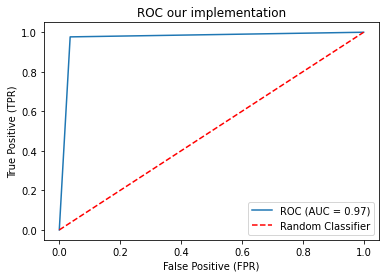

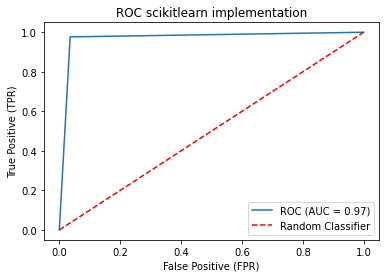

In [223]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, umbrales = roc_curve(test_b, pred_b)

auc = roc_auc_score(test_b, pred_b)

plt.plot(fpr, tpr, label='ROC (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'r--', label='Random Classifier')
plt.xlabel('False Positive (FPR)')
plt.ylabel('True Positive (TPR)')
plt.title('ROC our implementation')
plt.legend(loc='lower right')
plt.show()


fpr, tpr, umbrales = roc_curve(test_b, predSk_b)

auc_sklearn_dt = roc_auc_score(test_b, predSk_b)

plt.plot(fpr, tpr, label='ROC (AUC = {:.2f})'.format(auc_sklearn_dt))
plt.plot([0, 1], [0, 1], 'r--', label='Random Classifier')
plt.xlabel('False Positive (FPR)')
plt.ylabel('True Positive (TPR)')
plt.title('ROC scikitlearn implementation')
plt.legend(loc='lower right')
plt.show()


AUC (Area Under the Curve)

In [224]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(test_b, pred_b)
auc_sklearn = roc_auc_score(test_b, predSk_b)

pd.DataFrame([[auc, auc_sklearn]],
             ['AUC'],    
             ['Our Implementation', 'Sklearn\'s Implementation'])

,Our Implementation,Sklearn's Implementation
AUC,0.970424,0.970424
